# INFO 371 - Spring 2017
## Lab 6: Logistic Regression, Cross-Validation, Regularization

In [95]:
## Import packages.  Feel free to use other approaches.
## In R you may want to use ggplot instead.
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn import linear_model as lm
%matplotlib inline

## 1. Logistic Regression
### Iris Data Set

In this lab we are using iris data -- data about the form of the
blossom of different iris species.  Our task is to predict the species
based on the flower data.  The data is about _sepal_ and _petal_, two
different kind of flower petals:

![Sepal and Petal](petal_sepal.jpg)

The dataset includes leaf data for various individual flowers of three
species of iris: _setosa_, _virginica_, and _versicolor_

![Setosa, Virginica, Versicolor](setosa_virginica_versicolor.png)


In [100]:
## Load iris dataset (if you are using R: it's built-in into R)
from sklearn import datasets
iris = datasets.load_iris()
## Use the command below to explore the data
print(iris.DESCR)
print("Targets:", iris.target_names)
print("Features:", iris.feature_names)
print(iris.data[:5,:])
columns = iris.feature_names
columns.append('target')


Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

## 1 Graphical Exploration.

This dataset includes 4 features: length and width of flower petals
and sepals (see the images above).  Select two of these features and
create a scatterplot where you label the different species by
different color.

Repeat this for different pairs of features.  Comment your observations.

Feel free to make plots for all 6 pairs, but you can also do it for
fewer combinations.

In [174]:
## do it here
print(iris)


{'data': array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
 

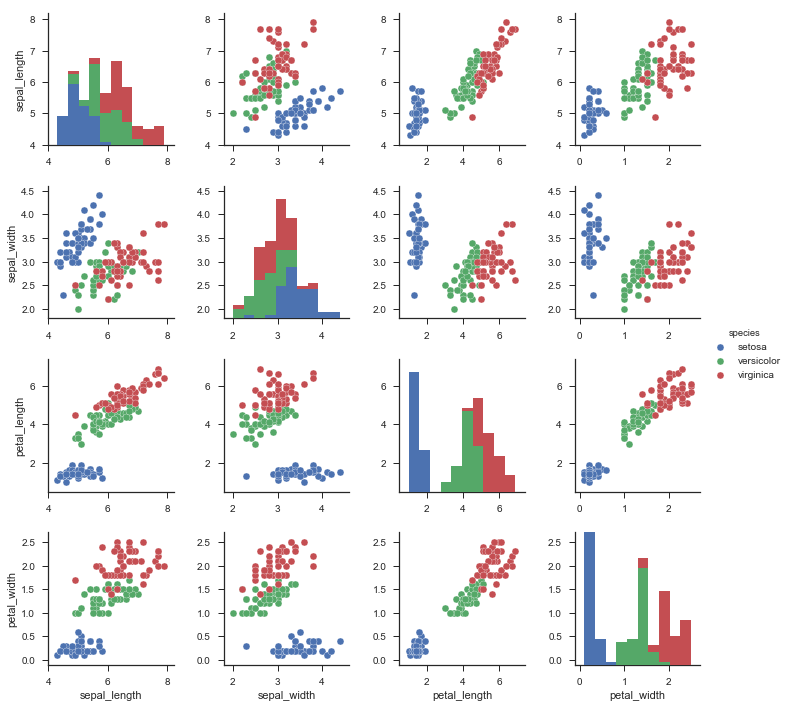

In [90]:
import seaborn as sns
sns.set(style="ticks")

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

In the sepal_width vs. sepal_length graph, sepal length increases as sepal width increases for all species. Sepal width and sepal length's domain and range for setosa is (3, 4) and (4, 6). Sepal width and sepal length's domain and range for versicolor is (2, 3.4) and (5, 7). Sepal width and sepal length's domain and range for virginica is (2, 4) and (4, 8).

In the petal_length vs. sepal_length graph, sepal length increases as petal length increases for all species. Range stays the same as above for all specie. Sepal width and sepal length's domain for setosa is (0, 2) . Sepal width and sepal length's domain for versicolor is (2, 6). Sepal width and sepal length's domain for virginica is (4, 8).

In the petal_width vs. sepal_length graph, the trend is vertical. Range stays the same as above for all specie. Sepal width and sepal length's domain for setosa is (0, 1) . Sepal width and sepal length's domain for versicolor is (1, 2). Sepal width and sepal length's domain for virginica is (1, 3).

In the sepal_length vs. sepal_width graph, sepal length increases as sepal width increases for all species. Sepal width and sepal length's domain and range for setosa is (4, 6) and (2, 4.5). Sepal width and sepal length's domain and range for versicolor is (4, 7) and (2, 3.5). Sepal width and sepal length's domain and range for virginica is (4, 8) and (2, 4).

In the petal_length vs. sepal_width graph, sepal length increases as petal length increases for all species. Range stays the same as above for all specie. The domain is same as petal_length vs. sepal_length graph for all species.

In the petal_width vs. sepal_width graph, sepal length increases as petal length increases for all species. Range stays the same as above for all specie. The domain is same as petal_width vs. sepal_length graph for all species.

In the sepal_length vs. petal_length graph, the domain is same as sepal_length vs. sepal_width graph for all specie. The range is (0, 2) for setosa, (2, 5) for versicolor, and (4, 7) for virginica.

In the sepal_width vs. petal_length graph, the domain is same as sepal_width vs. sepal_length graph for all specie. The range is same as sepal_length vs. petal_length graph for all specie.

In the petal_width vs. petal_length graph, the domain is same as petal_width vs. sepal_length graph for all specie. The range is same as sepal_width vs. petal_length graph.

In the sepal_length vs. petal_width graph, the domain is same as sepal_length vs. sepal_width graph for all specie. The range is (0, 0.5) for setosa, (1, 2) for versicolor, and (1, 2.5) for virginica.

In the sepal_width vs. petal_width graph, the domain is same as the petal_length vs. sepal_width graph. The range is same as the sepal_length vs. petal_width graph.

In the petal_length vs. petal_Width graph, the domain is same as the petal_length vs. sepal_width graph. The range is same as the sepal_width vs. petal_width graph.

# 2 Logistic Regression

Here your task is to use the petal dimensions as predictors and
classify the flowers.  As the standard logistic regression can only
handle two groups, we only select two species at time.

## 2.1 _setosa_ versus _virginica_

Select a subset of data that only contains _setosa_ and _virginica_
observations.  Estimate a logistic regression model on this subset
using 1,2,3, and all 4 features.
In python, I'd recommend to use
_sklearn.linear\_model.LogisticRegression_, in R just use _glm_.

For each logistic regression:

* list which features did you include
* print the estimated coefficients
* categorize the same observations to the species.  Hint: use
   _predict_.  Note: this is not the best ML practice as we ought to
  separate the data into trainig/testing data, but our purpose here is
  to learn logistic regression, not to come up with the best
  predictors.
* Compute your prediction accuracy, precision, and recall
* Compare your results to the figures above.  What can you conclude?

In [211]:
# your code
from pandas.core import datetools
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logreg = LogisticRegression()
iris = datasets.load_iris()

x_train, x_test, y_train, y_test = train_test_split(iris.data[:100, 0:1], iris.target[:100], test_size=0.25, random_state=0)
fit = logreg.fit(x_train, y_train)

print('Sepal Length (cm)')
print('Coefficient')
print(fit.coef_)
print('Predict')
print(fit.predict(x_test))
print('Prediction Accuracy')
print(fit.score(x_test, y_test))
print('Prediction Precision')
print(cross_val_score(logreg, x_train, y_train, cv=10, scoring='precision'))
print('Prediction Recall')
print(cross_val_score(logreg, x_train, y_train, cv=10, scoring='recall'))
print()

x_train, x_test, y_train, y_test = train_test_split(iris.data[:100, 1:2], iris.target[:100], test_size=0.25, random_state=0)
fit = logreg.fit(x_train, y_train)

print('Sepal Width (cm)')
print('Coefficient')
print(fit.coef_)
print('Predict')
print(fit.predict(x_test))
print('Prediction Accuracy')
print(fit.score(x_test, y_test))
print('Prediction Precision')
print(cross_val_score(logreg, x_train, y_train, cv=10, scoring='precision'))
print('Prediction Recall')
print(cross_val_score(logreg, x_train, y_train, cv=10, scoring='recall'))
print()

x_train, x_test, y_train, y_test = train_test_split(iris.data[:100, 2:3], iris.target[:100], test_size=0.25, random_state=0)
fit = logreg.fit(x_train, y_train)

print('Petal Length (cm)')
print('Coefficient')
print(fit.coef_)
print('Predict')
print(fit.predict(x_test))
print('Prediction Accuracy')
print(fit.score(x_test, y_test))
print('Prediction Precision')
print(cross_val_score(logreg, x_train, y_train, cv=10, scoring='precision'))
print('Prediction Recall')
print(cross_val_score(logreg, x_train, y_train, cv=10, scoring='recall'))
print()

x_train, x_test, y_train, y_test = train_test_split(iris.data[:100, 3:4], iris.target[:100], test_size=0.25, random_state=0)
fit = logreg.fit(x_train, y_train)

print('Petal Width (cm)')
print('Coefficient')
print(fit.coef_)
print('Predict')
print(fit.predict(x_test))
print('Prediction Accuracy')
print(fit.score(x_test, y_test))
print('Prediction Precision')
print(cross_val_score(logreg, x_train, y_train, cv=10, scoring='precision'))
print('Prediction Recall')
print(cross_val_score(logreg, x_train, y_train, cv=10, scoring='recall'))
print()

x_train, x_test, y_train, y_test = train_test_split(iris.data[:100, :4], iris.target[:100], test_size=0.25, random_state=0)
fit = logreg.fit(x_train, y_train)

print('All Feature')
print('Coefficient')
print(fit.coef_)
print('Predict')
print(fit.predict(x_test))
print('Prediction Accuracy')
print(fit.score(x_test, y_test))
print('Prediction Precision')
print(cross_val_score(logreg, x_train, y_train, cv=10, scoring='precision'))
print('Prediction Recall')
print(cross_val_score(logreg, x_train, y_train, cv=10, scoring='recall'))
print()

Sepal Length (cm)
Coefficient
[[ 0.4437935]]
Predict
[0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0]
Prediction Accuracy
0.88
Prediction Precision
[ 0.5         1.          0.66666667  0.57142857  0.75        0.5         0.8
  1.          0.75        1.        ]
Prediction Recall
[ 0.75  1.    1.    1.    0.75  0.75  1.    1.    1.    1.  ]

Sepal Width (cm)
Coefficient
[[-0.85085628]]
Predict
[0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0]
Prediction Accuracy
0.84
Prediction Precision
[ 1.    0.75  1.    1.    1.    1.    1.    1.    1.    1.  ]
Prediction Recall
[ 1.          0.75        0.5         0.25        0.5         0.75        0.75
  0.5         0.66666667  1.        ]

Petal Length (cm)
Coefficient
[[ 1.51299413]]
Predict
[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0]
Prediction Accuracy
1.0
Prediction Precision
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Prediction Recall
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]

Petal Width (cm)
Coefficient
[[ 3.45006136]]
Pred

Comparing my results to the figures above, absolute value of coefficient increases as the features change from sepal length to petal width. Prediction accuracy increases as the features change from sepal length to peal width. Also, prediction precision become more precise and the accuracy to the test set from the prediction become more accurate. So as we test more features, more precise and accurate the result becomes.

## 2.2  _virginica_ versus _versicolor_

Repeat the previous exercise, just select _virginica_ and _versicolor_
instead of _setosa_ and _virginica_.

Comment your results.


In [212]:
# your code
from pandas.core import datetools
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logreg = LogisticRegression()
iris = datasets.load_iris()

x_train, x_test, y_train, y_test = train_test_split(iris.data[50:150, 0:1], iris.target[50:150], test_size=0.25, random_state=0)
fit = logreg.fit(x_train, y_train)

print('Sepal Length (cm)')
print('Coefficient')
print(fit.coef_)
print('Predict')
print(fit.predict(x_test))
print('Prediction Accuracy')
print(fit.score(x_test, y_test))
print('Prediction Precision')
print(cross_val_score(logreg, x_train, y_train, cv=10, scoring='precision'))
print('Prediction Recall')
print(cross_val_score(logreg, x_train, y_train, cv=10, scoring='recall'))
print()

x_train, x_test, y_train, y_test = train_test_split(iris.data[50:150, 1:2], iris.target[50:150], test_size=0.25, random_state=0)
fit = logreg.fit(x_train, y_train)

print('Sepal Width (cm)')
print('Coefficient')
print(fit.coef_)
print('Predict')
print(fit.predict(x_test))
print('Prediction Accuracy')
print(fit.score(x_test, y_test))
print('Prediction Precision')
print(cross_val_score(logreg, x_train, y_train, cv=10, scoring='precision'))
print('Prediction Recall')
print(cross_val_score(logreg, x_train, y_train, cv=10, scoring='recall'))
print()

x_train, x_test, y_train, y_test = train_test_split(iris.data[50:150, 2:3], iris.target[50:150], test_size=0.25, random_state=0)
fit = logreg.fit(x_train, y_train)

print('Petal Length (cm)')
print('Coefficient')
print(fit.coef_)
print('Predict')
print(fit.predict(x_test))
print('Prediction Accuracy')
print(fit.score(x_test, y_test))
print('Prediction Precision')
print(cross_val_score(logreg, x_train, y_train, cv=10, scoring='precision'))
print('Prediction Recall')
print(cross_val_score(logreg, x_train, y_train, cv=10, scoring='recall'))
print()

x_train, x_test, y_train, y_test = train_test_split(iris.data[50:150, 3:4], iris.target[50:150], test_size=0.25, random_state=0)
fit = logreg.fit(x_train, y_train)

print('Petal Width (cm)')
print('Coefficient')
print(fit.coef_)
print('Predict')
print(fit.predict(x_test))
print('Prediction Accuracy')
print(fit.score(x_test, y_test))
print('Prediction Precision')
print(cross_val_score(logreg, x_train, y_train, cv=10, scoring='precision'))
print('Prediction Recall')
print(cross_val_score(logreg, x_train, y_train, cv=10, scoring='recall'))
print()

x_train, x_test, y_train, y_test = train_test_split(iris.data[50:150, :4], iris.target[50:150], test_size=0.25, random_state=0)
fit = logreg.fit(x_train, y_train)

print('All Feature')
print('Coefficient')
print(fit.coef_)
print('Predict')
print(fit.predict(x_test))
print('Prediction Accuracy')
print(fit.score(x_test, y_test))
print('Prediction Precision')
print(cross_val_score(logreg, x_train, y_train, cv=10, scoring='precision'))
print('Prediction Recall')
print(cross_val_score(logreg, x_train, y_train, cv=10, scoring='recall'))
print()

Sepal Length (cm)
Coefficient
[[ 0.27575582]]
Predict
[2 2 2 2 2 2 1 2 2 2 2 1 2 2 1 1 2 2 2 2 1 2 1 1 1]
Prediction Accuracy
0.64
Prediction Precision
[ 1.          0.          0.6         1.          1.          1.          1.
  1.          0.          0.66666667]
Prediction Recall
[ 0.25        0.          0.75        0.5         0.25        1.          0.5
  0.66666667  0.          0.66666667]

Sepal Width (cm)
Coefficient
[[ 0.3129308]]
Predict
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 1 2 1 2 2]
Prediction Accuracy
0.68
Prediction Precision
[ 1.          0.5         0.33333333  0.          1.          0.66666667
  0.5         0.66666667  1.          0.        ]
Prediction Recall
[ 0.5         0.25        0.25        0.          0.25        0.5         0.25
  0.66666667  0.33333333  0.        ]

Petal Length (cm)
Coefficient
[[ 0.7004829]]
Predict
[2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 1 2 1 2 2 1 2 1 2 1]
Prediction Accuracy
0.76
Prediction Precision
[ 1.   1.   0.8  1.   1.   1.   1.   1

/Users/song-euiyul/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/song-euiyul/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/song-euiyul/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Comparing my results to the figures above, absolute value of coefficient increases as the features change from sepal length to petal width. Prediction accuracy increases as the features change from sepal length to peal width. Also, prediction precision become more precise and the accuracy to the test set from the prediction become more accurate. So as we test more features, more precise and accurate the result becomes.